# Run QNet on Lander

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
import numpy as np
from tqdm.notebook import trange
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

sys.path.append('RL_lib/Agents/PPO')
sys.path.append('RL_lib/Utils')
sys.path.append('../')

import QLearn
import env_lib
from policy_ppo import Policy
from value_function import Value_function
from utils import Mapminmax,Logger,Scaler
import utils
from env_gaudet_lander import LanderEnvironment, int_to_bin, bin_to_int

In [ ]:
env = LanderEnvironment()
obs_dim = 12
act_dim = 4

policy = Policy(obs_dim,act_dim,kl_targ=0.001,epochs=20, beta=0.1, shuffle=True, servo_kl=True, discretize=True)

fname = "opt_discrete_4km"
input_normalizer = utils.load_run(policy,fname)

## Baseline Performances

In [5]:
def ppo_policy(s):
    s_norm = input_normalizer.apply(s)
    a = policy.sample(s_norm.reshape(1,-1))
    return bin_to_int(list(a[1][0]))

def random_policy(s):
    return np.random.randint(16)

In [7]:
R_rand = QLearn.heuristic_demo(random_policy,env,100)

6dof dynamics model
Quaternion_attitude
Thruster Config Shape:  (4, 6) 4
queue fixed
Flat Constraint


*** ATT VIO TYPE CNT:  [0. 0. 1.]



In [10]:
policy.test_mode=True
R_ppo = QLearn.heuristic_demo(ppo_policy,env,10)

In [6]:
policy.test_mode=True
mem_ppo = QLearn.heuristic_memory_demo(ppo_policy,env,20,fname='demo_disc.pkl')

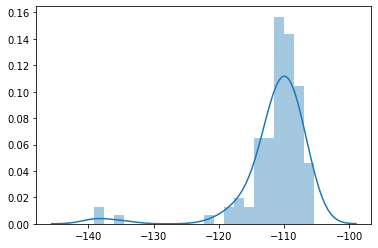

In [11]:
sns.distplot(R_rand)

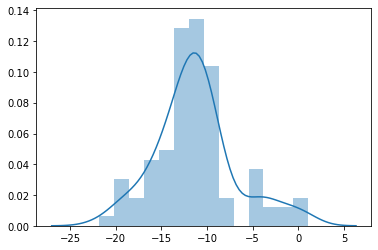

In [16]:
sns.distplot(R_ppo)

## Running Q Agent with Guidance

In [ ]:
N_ep = 2000
policy.test_mode=True
agent = QLearn.QAgent(env, net_type='QNet', f_heur=ppo_policy, n_heur=100,
                    update_steps=10, N_hid=100, eps0=0.9, gamma=0.99, n_eps=1500, memory_size=100000, minibatch_size=25)
R_ep, agent, env = do_run(agent, env, N_ep)

In [9]:
agent.nn.sess.close()

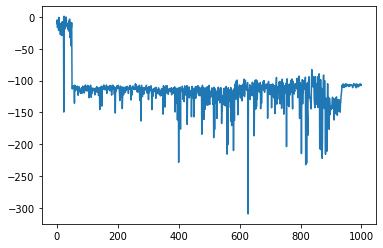

In [26]:
plt.plot(R_ep)

Using demo memory

In [19]:
del agent

In [ ]:
N_ep = 50000
dmem=pickle.load(open('demo_disc.pkl','rb'))
env = LanderEnvironment()
agent = QLearn.QAgent(env,net_type='MLPQNet',hidden_layers=[160, 80],alpha=1e-4,gamma=0.99,eps0=0.25,n_eps=40000,minibatch_size=100,memory_size=500000,demo_memory=dmem,n_demo=100)
fname = 'lander_demo_test_24_3_0.pkl'
R, steps, agent, env = QLearn.do_run(agent, env, N_ep, save_name = fname, show_progress=True)

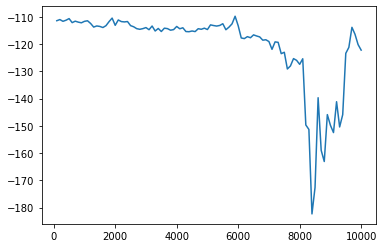

In [18]:
x,R_s=R.smooth()
plt.plot(x,R_s)

Showing example runs

In [4]:
data_all = []
for i in range(8):
    data_all.append(pickle.load(open('test_demo_21_3_{}.pkl'.format(i),'rb')))
print(['{}: {}'.format(i,np.mean(r['R'][-100:]).round(1)) for i, r in enumerate(data_all)])

['0: -138.6', '1: -161.7', '2: -133.7', '3: -123.0', '4: -140.8', '5: -122.6', '6: -193.8', '7: -121.0']


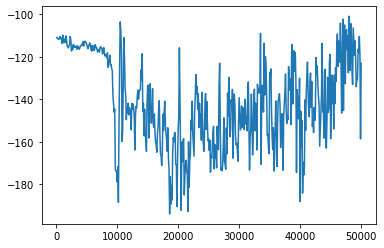

In [5]:
run_no = 3

x,R = data_all[run_no]['R'].smooth()
plt.plot(x,R)

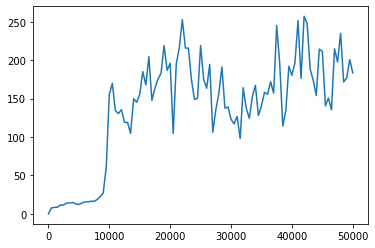

In [12]:
run_no = 3

steps = data_all[run_no]['step']
x,s_avg = QLearn.data_smooth(steps,500)
plt.plot(x,s_avg)

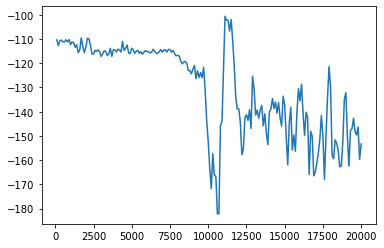

In [15]:
data_samp = pickle.load(open('lander_demo_test_20_3_mlp1.pkl','rb'))
x,R = data_samp['R'].smooth()
plt.plot(x,R)

## Using Prioritised Experience Replay

Inertia Tensor:  [[2000.    0.    0.]
 [   0. 2000.    0.]
 [   0.    0. 3200.]]
Lander Model: 
 - apf_v0:  70
 - apf_vf1:  [ 0.  0. -2.]
 - apf_vf2:  [ 0.  0. -1.]
 - apf_atarg:  15.0
 - apf_tau1:  20
 - apf_tau2:  100.0
Attitude Constraint
Reward_terminal
lander env att 2 fixed
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Run Start...


*** ATT VIO TYPE CNT:  [0. 0. 1.]
*** ATT VIO TYPE CNT:  [ 0. 29. 74.]


KeyboardInterrupt: 

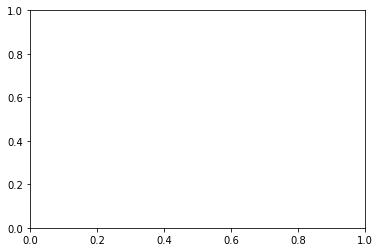

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

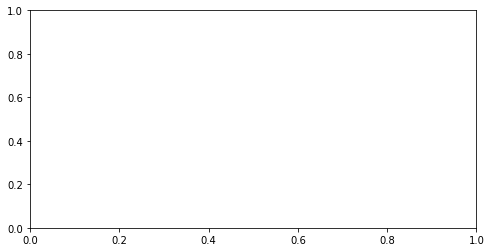

In [4]:
N_ep = 1000
dmem=pickle.load(open('demo_disc.pkl','rb'))
env = LanderEnvironment()
agent = QLearn.PerQAgent(env,demo_memory=dmem)
print('Run Start...')
_ = QLearn.do_run(agent, env, N_ep, show_progress=True)

In [14]:
agent.memory

In [19]:
asdf = np.array([1,2,3,4])
t=asdf.copy()
asdf[2] = 5

In [20]:
print(t)

[1 2 3 4]
